<a href="https://colab.research.google.com/github/MashaKubyshina/Learning_to_code/blob/master/Twitter_Feed_Analysis_For_Crypto_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analysis of tweets for the final project / data science class**


Initial set of questions I asked myself

1. What are top 15 words used in tweets with the word "crypto" in them?
2. How does this set of 15 words change by hour in a given day (run it for 6 3. hours on the hour) and see the variance.
4. How does this set of 15 words change by day (run it for 4 consecutive days pulling the same data each day) and see the variance.
5. What is the time span to generate 1000 tweets on crypto topic on twitter? 6. Is it consistent hourly and daily?
7. What cryptocurrencies are mentioned in the tweets, how often and are there are consistent winners?
8. What is the slang vocabulary (incorrect English vocabulary, abbreviations, etc) used when talking about crypto in twitter?
9. Any other patterns we can observe from the data?


Process I followed:


1. Pull 1000 tweets with keyword “crypto”
2. Analyze the dataset
3. Find out the time lapse between 1st and last tweet
4. Clean the data
5. Find out most popular 15 words after cleaning the data
6. Present the list of most popular 15 words and a plot
7. Create word cloud of words in tweets that get over 15 retweets
8. Get a list and count of cryptocurrencies used in this set

Test 1: Analyze this data hourly for 6 hours (6 data samples)

Test 2: Analyze this data daily for 3 days (3 data samples)

I googled many pieces of the code (I will try to give credit when I used a specific blog apart from stackoverflow and python documentation)



In [ ]:
## Note before starting:
## I wanted to use realtime tweets to create a dataset around a specific topic and analyse the words
## What I needed to do was:
## Create dev account of twitter and access through the API to pull tweets by keyword
## Import libraries
## Explore the dataset
## Clean the dataset from puncuation and symbols
## Clean stopwords and slang
## Group by specific words / columns 
## Analyze time lapse
## Analyze and plot the most common words and currencies used in the tweets
## Learn terminology to google solutions for my problems

In [ ]:
# Import the following libraries

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
import tweepy
from tweepy import OAuthHandler
import json
%matplotlib inline
pd.set_option('display.max_colwidth', 100)
import os
import collections
import warnings
warnings.filterwarnings("ignore")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
import networkx

In [ ]:
## Access Tweeter API and pull tweets on the relevant topic

## To access Twitter API, you can go to https://developer.twitter.com/en/apps/ and log in to get 
## the authentication keys and tokens. 
## Then use them in the following code to get you started
## You will need to enter your keys and tokens after #Authentication

def get_tweets(topic, n):
    # Authentication
    c_key = # enter your key here
    c_secret =  # enter your secret key here
    a_token = # enter your token here
    a_secret = # enter your secret token here

    auth = OAuthHandler(c_key, c_secret)
    auth.set_access_token(a_token, a_secret)
    api = tweepy.API(auth)

    # Get the most recent tweets for this topic
    tweets = []
    for tweet in tweepy.Cursor(api.search, q=topic, lang='en').items(n):
        tweets.append(tweet)
    return tweets

def get_text(tweets):
    tweet_texts = []
    for tweet in tweets:
        tweet = re.sub(r"http\S+", "", tweet.text)
        tweet = re.sub(r"@\S+", "", tweet)
        tweet = re.sub(r"RT ", "", tweet)
        tweet_texts.append(tweet)
    return tweet_texts
    
# test with pulling 10 tweets that it works on a given keyword (used #doge here)
get_tweets("#doge", 10)

[Status(_api=<tweepy.api.API object at 0x7f66e2aee790>, _json={'created_at': 'Thu Mar 18 22:35:25 +0000 2021', 'id': 1372678050740068353, 'id_str': '1372678050740068353', 'text': 'Why aren’t more people learning #FOREX !? It’s the easiest way to make $50 to $100 5 days a week from #HOME !!… https://t.co/eni4jwGJWz', 'truncated': True, 'entities': {'hashtags': [{'text': 'FOREX', 'indices': [32, 38]}, {'text': 'HOME', 'indices': [102, 107]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/eni4jwGJWz', 'expanded_url': 'https://twitter.com/i/web/status/1372678050740068353', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [112, 135]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': 

In [ ]:
# Pull the real dataset that I am going to be using
# For this project I decided to pull the dataset with keyword "crypto" in the tweets
# I pulled 1000 tweets every hour for the duration of the project (total 10 pulls)
# I analyzed data for the 10 datasets to understand the stability of the data

crypto_data=get_tweets("crypto", 1000)

In [ ]:
# Check the type

type(crypto_data)

list

In [ ]:
# Create a dataframe and store the tweets there
# I call this dataframe df_crypto

json_data = [r._json for r in crypto_data]

df_crypto = pd.io.json.json_normalize(json_data)

In [ ]:
# Check shape and columns

print('Dataset size:',df_crypto.shape)
print('Columns are:',df_crypto.columns)

Dataset size: (1000, 319)
Columns are: Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       ...
       'place.country_code', 'place.country', 'place.contained_within',
       'place.bounding_box.type', 'place.bounding_box.coordinates',
       'retweeted_status.quoted_status.quoted_status_id',
       'retweeted_status.quoted_status.quoted_status_id_str',
       'retweeted_status.scopes.followers', 'quoted_status.quoted_status_id',
       'quoted_status.quoted_status_id_str'],
      dtype='object', length=319)


In [ ]:
# Check info

df_crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 319 entries, created_at to quoted_status.quoted_status_id_str
dtypes: bool(18), float64(61), int64(9), object(231)
memory usage: 2.3+ MB


In [ ]:
# Check the columns and how the dataset looks

df_crypto.head(10)

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,entities.hashtags,entities.symbols,entities.user_mentions,entities.urls,metadata.iso_language_code,metadata.result_type,user.id,user.id_str,user.name,user.screen_name,user.location,user.description,user.url,user.entities.description.urls,user.protected,user.followers_count,user.friends_count,user.listed_count,user.created_at,...,quoted_status.user.translator_type,quoted_status.geo,quoted_status.coordinates,quoted_status.place,quoted_status.contributors,quoted_status.is_quote_status,quoted_status.retweet_count,quoted_status.favorite_count,quoted_status.favorited,quoted_status.retweeted,quoted_status.possibly_sensitive,quoted_status.lang,entities.media,extended_entities.media,retweeted_status.place.id,retweeted_status.place.url,retweeted_status.place.place_type,retweeted_status.place.name,retweeted_status.place.full_name,retweeted_status.place.country_code,retweeted_status.place.country,retweeted_status.place.contained_within,retweeted_status.place.bounding_box.type,retweeted_status.place.bounding_box.coordinates,retweeted_status.quoted_status.user.entities.url.urls,place.id,place.url,place.place_type,place.name,place.full_name,place.country_code,place.country,place.contained_within,place.bounding_box.type,place.bounding_box.coordinates,retweeted_status.quoted_status.quoted_status_id,retweeted_status.quoted_status.quoted_status_id_str,retweeted_status.scopes.followers,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str
0,Thu Mar 18 22:35:47 +0000 2021,1372678146252709888,1372678146252709888,"RT @CoinMarketCap: .@Chiliz, one of the biggest names in the blockchain space for virtual sports...",False,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NaN,None,NaN,None,None,None,None,NaN,None,False,280,0,False,False,en,[],[],"[{'screen_name': 'CoinMarketCap', 'name': 'CoinMarketCap', 'id': 2260491445, 'id_str': '22604914...",[],en,recent,1160369318325919744,1160369318325919744,Rosalyn Angelina,RosalynAngelina,,Im going to the 🌑 with crypto 😍\n$BNB $AVA $ETH $DOT $TRX $XVG $ZIL HODLer\nSplinterlands name: ...,None,[],False,123,694,1,Sun Aug 11 01:56:18 +0000 2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Thu Mar 18 22:35:47 +0000 2021,1372678144021381120,1372678144021381120,RT @idaveofficial: This is a bull race. Which ride do you select ? One is going to Moon🌑 another...,False,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",NaN,None,NaN,None,None,None,None,NaN,None,False,1,0,False,False,en,"[{'text': 'siacoin', 'indices': [115, 123]}, {'text': 'Cardano', 'indices': [124, 132]}]",[],"[{'screen_name': 'idaveofficial', 'name': 'Chintan Khagesh Dave', 'id': 450760379, 'id_str': '45...",[],en,recent,1326669518689722368,1326669518689722368,DOGE STYLE 💲💵💰,DogeFem,Global,My favorite coins are $ADA $LTC $DOT I’m excited to see $Sc ( #SiaCoin )and $DOGE take off the m...,None,[],False,636,1180,3,Wed Nov 11 23:34:09 +0000 2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Thu Mar 18 22:35:47 +0000 2021,1372678143903989768,1372678143903989768,@crypto_merlion @loomdart Can you share the wallet address?,False,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.372665e+18,1372665191301664772,1.132614e+18,1132614285840928768,crypto_merlion,None,None,NaN,None,False,0,0,False,False,en,[],[],"[{'screen_name': 'crypto_merlion', 'name': 'Crypto Merlion', 'id': 1132614285840928768, 'id_str'...",[],en,recent,39560065,39560065,banana69,A

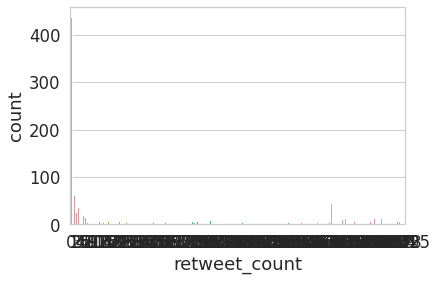

In [ ]:
# I am interested in tweet popularity
# As part of my exploratory data analysis (EDA), I make a plot of "retweet_count"
# With so much data it is not very informative

sns.countplot(x = 'retweet_count', data = df_crypto)

In [ ]:
# Create time column
# This will help answer the question how long it takes for the public to produce 1000 tweets on this topic

df_crypto['Dates'] = pd.to_datetime(df_crypto['created_at']).dt.date
df_crypto['Time'] = pd.to_datetime(df_crypto['created_at']).dt.time

# Check head to see the last time stamp
df_crypto.head(3) 

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,entities.hashtags,entities.symbols,entities.user_mentions,entities.urls,metadata.iso_language_code,metadata.result_type,user.id,user.id_str,user.name,user.screen_name,user.location,user.description,user.url,user.entities.description.urls,user.protected,user.followers_count,user.friends_count,user.listed_count,user.created_at,...,quoted_status.coordinates,quoted_status.place,quoted_status.contributors,quoted_status.is_quote_status,quoted_status.retweet_count,quoted_status.favorite_count,quoted_status.favorited,quoted_status.retweeted,quoted_status.possibly_sensitive,quoted_status.lang,entities.media,extended_entities.media,retweeted_status.place.id,retweeted_status.place.url,retweeted_status.place.place_type,retweeted_status.place.name,retweeted_status.place.full_name,retweeted_status.place.country_code,retweeted_status.place.country,retweeted_status.place.contained_within,retweeted_status.place.bounding_box.type,retweeted_status.place.bounding_box.coordinates,retweeted_status.quoted_status.user.entities.url.urls,place.id,place.url,place.place_type,place.name,place.full_name,place.country_code,place.country,place.contained_within,place.bounding_box.type,place.bounding_box.coordinates,retweeted_status.quoted_status.quoted_status_id,retweeted_status.quoted_status.quoted_status_id_str,retweeted_status.scopes.followers,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str,Dates,Time
0,Thu Mar 18 22:35:47 +0000 2021,1372678146252709888,1372678146252709888,"RT @CoinMarketCap: .@Chiliz, one of the biggest names in the blockchain space for virtual sports...",False,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NaN,None,NaN,None,None,None,None,NaN,None,False,280,0,False,False,en,[],[],"[{'screen_name': 'CoinMarketCap', 'name': 'CoinMarketCap', 'id': 2260491445, 'id_str': '22604914...",[],en,recent,1160369318325919744,1160369318325919744,Rosalyn Angelina,RosalynAngelina,,Im going to the 🌑 with crypto 😍\n$BNB $AVA $ETH $DOT $TRX $XVG $ZIL HODLer\nSplinterlands name: ...,None,[],False,123,694,1,Sun Aug 11 01:56:18 +0000 2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-18,22:35:47
1,Thu Mar 18 22:35:47 +0000 2021,1372678144021381120,1372678144021381120,RT @idaveofficial: This is a bull race. Which ride do you select ? One is going to Moon🌑 another...,False,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",NaN,None,NaN,None,None,None,None,NaN,None,False,1,0,False,False,en,"[{'text': 'siacoin', 'indices': [115, 123]}, {'text': 'Cardano', 'indices': [124, 132]}]",[],"[{'screen_name': 'idaveofficial', 'name': 'Chintan Khagesh Dave', 'id': 450760379, 'id_str': '45...",[],en,recent,1326669518689722368,1326669518689722368,DOGE STYLE 💲💵💰,DogeFem,Global,My favorite coins are $ADA $LTC $DOT I’m excited to see $Sc ( #SiaCoin )and $DOGE take off the m...,None,[],False,636,1180,3,Wed Nov 11 23:34:09 +0000 2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-18,22:35:47
2,Thu Mar 18 22:35:47 +0000 2021,1372678143903989768,1372678143903989768,@crypto_merlion @loomdart Can you share the wallet address?,False,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.372665e+18,1372665191301664772,1.132614e+18,1132614285840928768,crypto_merlion,None,None,NaN,None,False,0,0,False,False,en,[],[],"[{'screen_name': 'crypto_merlion', 'name': 'Crypto Merlion', 'id': 1132614285840928768, 'id_str'...",[],en,recent,39560065,39560065,banana69,AlphaFruit_,,Future

In [ ]:
# Check tail to see the first time stamp

df_crypto.tail(3)

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,entities.hashtags,entities.symbols,entities.user_mentions,entities.urls,metadata.iso_language_code,metadata.result_type,user.id,user.id_str,user.name,user.screen_name,user.location,user.description,user.url,user.entities.description.urls,user.protected,user.followers_count,user.friends_count,user.listed_count,user.created_at,...,quoted_status.coordinates,quoted_status.place,quoted_status.contributors,quoted_status.is_quote_status,quoted_status.retweet_count,quoted_status.favorite_count,quoted_status.favorited,quoted_status.retweeted,quoted_status.possibly_sensitive,quoted_status.lang,entities.media,extended_entities.media,retweeted_status.place.id,retweeted_status.place.url,retweeted_status.place.place_type,retweeted_status.place.name,retweeted_status.place.full_name,retweeted_status.place.country_code,retweeted_status.place.country,retweeted_status.place.contained_within,retweeted_status.place.bounding_box.type,retweeted_status.place.bounding_box.coordinates,retweeted_status.quoted_status.user.entities.url.urls,place.id,place.url,place.place_type,place.name,place.full_name,place.country_code,place.country,place.contained_within,place.bounding_box.type,place.bounding_box.coordinates,retweeted_status.quoted_status.quoted_status_id,retweeted_status.quoted_status.quoted_status_id_str,retweeted_status.scopes.followers,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str,Dates,Time
997,Thu Mar 18 22:26:03 +0000 2021,1372675695566974977,1372675695566974977,RT @LockedInTeam: I'll give $100 to a random person who retweets this tweet &amp; follows @BcGam...,False,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NaN,None,NaN,None,None,None,None,NaN,None,False,267,0,False,False,en,[],[],"[{'screen_name': 'LockedInTeam', 'name': 'Locked In Team #LiT', 'id': 1363048175875944452, 'id_s...",[],en,recent,1014873587604512768,1014873587604512768,ً,tsinayy,pilipinas,personal/stan acc | magulo #LiT #flurwin #OgKittenCrew #TXFam 6️⃣5️⃣🎹,https://t.co/kPatAk8Pef,[],False,160,2334,2,Thu Jul 05 14:08:13 +0000 2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-18,22:26:03
998,Thu Mar 18 22:26:03 +0000 2021,1372675693893484549,1372675693893484549,"@TheStalwart By the time the bonds mature, every asset (stocks, crypto, commodities, real estate...",True,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",1.372579e+18,1372579108237021185,14096763.0,14096763,TheStalwart,None,None,NaN,None,False,0,0,False,False,en,[],[],"[{'screen_name': 'TheStalwart', 'name': 'Joe Weisenthal', 'id': 14096763, 'id_str': '14096763', ...","[{'url': 'https://t.co/WdalGIE8mJ', 'expanded_url': 'https://twitter.com/i/web/status/1372675693...",en,recent,35763666,35763666,Will McCormick,TakeoWT,The moon,"Comms Lead @OKCoin cryptocurrency exchange, Founder @pure_knot - crypto nerd #HODL 🇮🇪 #defidegen...",None,[],False,1520,3691,38,Mon Apr 27 15:06:17 +0000 2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-18,22:26:03
999,Thu Mar 18 22:26:03 +0000 2021,1372675693230895104,1372675693230895104,RT @Workedia: 1/ #Bitcoin CT &gt; Crypto Traders vs Clown Town.\n\nClown Town:\n1. Herd mentalit...,False,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NaN,None,NaN,None,None,None,None,NaN,None,False,14,0,False,False,en,"[{'text': 'Bitcoin', 'indices': [17, 25]}]",[],"[{'screen_name': 'Workedia', 'name': 'Fomocap trades', 'id': 31618785, 'id_str': '31618785', 'in...",[],en,recent,1

In [ ]:
# check that all the tweets belong to the same date

df_crypto['Dates'].unique()

array([datetime.date(2021, 3, 18)], dtype=object)

In [ ]:
# Check what is the time lapse between broadcasting 1st and last tweet in this dataset

t1=pd.to_datetime(df_crypto['created_at'][0])
t2=pd.to_datetime(df_crypto['created_at'][999])
print("First tweet at ", t2)
print("Last tweet at ", t1)

# To get the result in seconds use devide it by 60

time_lapse=pd.Timedelta(t1-t2).seconds / 60.0
print("Time between first and last tweets in this set in minutes: ", time_lapse)

First tweet at  2021-03-18 22:26:03+00:00
Last tweet at  2021-03-18 22:35:47+00:00
Time between first and last tweets in this set in minutes:  9.733333333333333


In [ ]:
df_crypto.head(5)

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,entities.hashtags,entities.symbols,entities.user_mentions,entities.urls,metadata.iso_language_code,metadata.result_type,user.id,user.id_str,user.name,user.screen_name,user.location,user.description,user.url,user.entities.description.urls,user.protected,user.followers_count,user.friends_count,user.listed_count,user.created_at,...,quoted_status.coordinates,quoted_status.place,quoted_status.contributors,quoted_status.is_quote_status,quoted_status.retweet_count,quoted_status.favorite_count,quoted_status.favorited,quoted_status.retweeted,quoted_status.possibly_sensitive,quoted_status.lang,entities.media,extended_entities.media,retweeted_status.place.id,retweeted_status.place.url,retweeted_status.place.place_type,retweeted_status.place.name,retweeted_status.place.full_name,retweeted_status.place.country_code,retweeted_status.place.country,retweeted_status.place.contained_within,retweeted_status.place.bounding_box.type,retweeted_status.place.bounding_box.coordinates,retweeted_status.quoted_status.user.entities.url.urls,place.id,place.url,place.place_type,place.name,place.full_name,place.country_code,place.country,place.contained_within,place.bounding_box.type,place.bounding_box.coordinates,retweeted_status.quoted_status.quoted_status_id,retweeted_status.quoted_status.quoted_status_id_str,retweeted_status.scopes.followers,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str,Dates,Time
0,Thu Mar 18 22:35:47 +0000 2021,1372678146252709888,1372678146252709888,"RT @CoinMarketCap: .@Chiliz, one of the biggest names in the blockchain space for virtual sports...",False,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NaN,None,NaN,None,None,None,None,NaN,None,False,280,0,False,False,en,[],[],"[{'screen_name': 'CoinMarketCap', 'name': 'CoinMarketCap', 'id': 2260491445, 'id_str': '22604914...",[],en,recent,1160369318325919744,1160369318325919744,Rosalyn Angelina,RosalynAngelina,,Im going to the 🌑 with crypto 😍\n$BNB $AVA $ETH $DOT $TRX $XVG $ZIL HODLer\nSplinterlands name: ...,None,[],False,123,694,1,Sun Aug 11 01:56:18 +0000 2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-18,22:35:47
1,Thu Mar 18 22:35:47 +0000 2021,1372678144021381120,1372678144021381120,RT @idaveofficial: This is a bull race. Which ride do you select ? One is going to Moon🌑 another...,False,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",NaN,None,NaN,None,None,None,None,NaN,None,False,1,0,False,False,en,"[{'text': 'siacoin', 'indices': [115, 123]}, {'text': 'Cardano', 'indices': [124, 132]}]",[],"[{'screen_name': 'idaveofficial', 'name': 'Chintan Khagesh Dave', 'id': 450760379, 'id_str': '45...",[],en,recent,1326669518689722368,1326669518689722368,DOGE STYLE 💲💵💰,DogeFem,Global,My favorite coins are $ADA $LTC $DOT I’m excited to see $Sc ( #SiaCoin )and $DOGE take off the m...,None,[],False,636,1180,3,Wed Nov 11 23:34:09 +0000 2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-18,22:35:47
2,Thu Mar 18 22:35:47 +0000 2021,1372678143903989768,1372678143903989768,@crypto_merlion @loomdart Can you share the wallet address?,False,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.372665e+18,1372665191301664772,1.132614e+18,1132614285840928768,crypto_merlion,None,None,NaN,None,False,0,0,False,False,en,[],[],"[{'screen_name': 'crypto_merlion', 'name': 'Crypto Merlion', 'id': 1132614285840928768, 'id_str'...",[],en,recent,39560065,39560065,banana69,AlphaFruit_,,Future

In [ ]:
df_crypto.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,place,retweet_count,favorite_count,user.id,user.followers_count,user.friends_count,user.listed_count,user.favourites_count,user.statuses_count,retweeted_status.id,retweeted_status.in_reply_to_status_id,retweeted_status.in_reply_to_user_id,retweeted_status.user.id,retweeted_status.user.followers_count,retweeted_status.user.friends_count,retweeted_status.user.listed_count,retweeted_status.user.favourites_count,retweeted_status.user.utc_offset,retweeted_status.user.time_zone,retweeted_status.user.statuses_count,retweeted_status.user.lang,retweeted_status.geo,retweeted_status.coordinates,retweeted_status.place,retweeted_status.contributors,retweeted_status.retweet_count,retweeted_status.favorite_count,quoted_status_id,retweeted_status.quoted_status_id,retweeted_status.quoted_status.id,retweeted_status.quoted_status.in_reply_to_status_id,retweeted_status.quoted_status.in_reply_to_user_id,retweeted_status.quoted_status.user.id,retweeted_status.quoted_status.user.followers_count,retweeted_status.quoted_status.user.friends_count,retweeted_status.quoted_status.user.listed_count,retweeted_status.quoted_status.user.favourites_count,retweeted_status.quoted_status.user.utc_offset,retweeted_status.quoted_status.user.time_zone,retweeted_status.quoted_status.user.statuses_count,retweeted_status.quoted_status.user.lang,retweeted_status.quoted_status.geo,retweeted_status.quoted_status.coordinates,retweeted_status.quoted_status.place,retweeted_status.quoted_status.contributors,retweeted_status.quoted_status.retweet_count,retweeted_status.quoted_status.favorite_count,quoted_status.id,quoted_status.in_reply_to_status_id,quoted_status.in_reply_to_user_id,quoted_status.user.id,quoted_status.user.followers_count,quoted_status.user.friends_count,quoted_status.user.listed_count,quoted_status.user.favourites_count,quoted_status.user.utc_offset,quoted_status.user.time_zone,quoted_status.user.statuses_count,quoted_status.user.lang,quoted_status.geo,quoted_status.coordinates,quoted_status.place,quoted_status.contributors,quoted_status.retweet_count,quoted_status.favorite_count,retweeted_status.quoted_status.quoted_status_id,quoted_status.quoted_status_id
count,1.000000e+03,2.860000e+02,2.910000e+02,0.0,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.00000,1000.000000,1000.00000,1000.000000,5.390000e+02,3.500000e+01,4.100000e+01,5.390000e+02,5.390000e+02,539.000000,539.000000,539.000000,0.0,0.0,539.000000,0.0,0.0,0.0,0.0,0.0,539.000000,539.000000,4.900000e+01,2.800000e+01,2.800000e+01,4.000000e+00,4.000000e+00,2.800000e+01,2.800000e+01,28.000000,28.000000,28.000000,0.0,0.0,28.000000,0.0,0.0,0.0,0.0,0.0,28.000000,28.000000,2.100000e+01,1.000000e+00,1.0,2.100000e+01,2.100000e+01,21.000000,21.000000,21.000000,0.0,0.0,21.000000,0.0,0.0,0.0,0.0,0.0,21.000000,21.000000,3.000000e+00,3.000000e+00
mean,1.372677e+18,1.372073e+18,7.349188e+17,NaN,393.866000,0.294000,8.089323e+17,3.424463e+03,1076.44200,41.354000,10938.59200,16874.799000,1.371801e+18,1.372468e+18,9.289863e+17,7.905877e+17,1.054223e+05,1943.397032,636.012987,17544.643785,NaN,NaN,13932.046382,NaN,NaN,NaN,NaN,NaN,730.662338,870.855288,1.372317e+18,1.372182e+18,1.372182e+18,1.372195e+18,4.541724e+17,7.963067e+17,3.540872e+06,494.714286,4834.642857,15410.285714,NaN,NaN,9162.214286,NaN,NaN,NaN,NaN,NaN,239.285714,1677.035714,1.372498e+18,1.372581e+18,5633002.0,5.033485e+17,1.711790e+06,1016.809524,4019.000000,7129.714286,NaN,NaN,32575.714286,NaN,NaN,NaN,NaN,NaN,3405.761905,5462.238095,1.372376e+18,1.372363e+18
std,7.012535e+11,7.865010e+15,5.581326e+17,NaN,1295.815236,1.423935,5.672583e+17,3.856606e+04,3738.26136,420.794378,28062.37675,65033.782255,9.340350e+15,4.895653e+14,4.690100e+17,5.270050e+17,2.511171e+05,8980.875507,1856.973724,53363.284204,NaN,NaN,43481.120961,NaN,NaN,NaN,NaN,NaN,1694.531855,1759.704039,6.278292e+14,7.903088e+14,7.903088e+14,7.818401e+14,5.404742e+17,4.473124e+17,1.290141e+07,1182.798153,17357.416161,56191.199167,NaN,NaN,27408.5073

In [ ]:
# Check the lengh

len(df_crypto)

1000

In [ ]:
# Check columns

df_crypto.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       ...
       'place.contained_within', 'place.bounding_box.type',
       'place.bounding_box.coordinates',
       'retweeted_status.quoted_status.quoted_status_id',
       'retweeted_status.quoted_status.quoted_status_id_str',
       'retweeted_status.scopes.followers', 'quoted_status.quoted_status_id',
       'quoted_status.quoted_status_id_str', 'Dates', 'Time'],
      dtype='object', length=321)

In [ ]:
# After exploring the whole dataset, I decide that I only need certain columns to work furhter
# I create a new dataframe with 8 columns

df=df_crypto[['text', 'user.location', 'user.description', 'retweet_count','favorite_count', 'user.followers_count', 'Dates', 'Time' ]]
df

,text,user.location,user.description,retweet_count,favorite_count,user.followers_count,Dates,Time
0,"RT @CoinMarketCap: .@Chiliz, one of the biggest names in the blockchain space for virtual sports...",,Im going to the 🌑 with crypto 😍\n$BNB $AVA $ETH $DOT $TRX $XVG $ZIL HODLer\nSplinterlands name: ...,280,0,123,2021-03-18,22:35:47
1,RT @idaveofficial: This is a bull race. Which ride do you select ? One is going to Moon🌑 another...,Global,My favorite coins are $ADA $LTC $DOT I’m excited to see $Sc ( #SiaCoin )and $DOGE take off the m...,1,0,636,2021-03-18,22:35:47
2,@crypto_merlion @loomdart Can you share the wallet address?,,Futures Trader - shorting bottoms and longing tops since 2017 - $ES $SI $XBT,0,0,273,2021-03-18,22:35:47
3,$BTC UPDATE!!❗️❗️❗️\n\nCheckout the link in bio for crypto signals\n\n$BEAM #cryptocurrency $ZEC...,,For CRYPTO SIGNALS: https://t.co/VOko3Gq52d and For FOREX SIGNALS: https://t.co/ReyJxe5rm8,0,0,22,2021-03-18,22:35:47
4,RT @FinanceCrystal: 🆓️Get free 1000 $CRYSTAL #Airdrop ! Money bag👇\n\n🔶 Follow &amp; RT pinned p...,,"I'm a woman of integrity ,a God's fearing woman very hard-working, pursuing a brighter future an...",464,0,11,2021-03-18,22:35:46
...,...,...,...,...,...,...,...,...
995,"RT @shaineschroeder: “Samo”\nAcrylic on Canvas, 6 ft. x 5 ft. 10 in.\n\n#nft #cryptoart #nftart ...",,During your life never stop dreaming no one can take that away your dreams -Tupac,3,0,328,2021-03-18,22:26:03
996,RT @Paloresow: In addition to pretending to be an SNP supporter in favour of #IndyRef2 &amp; #An...,μμ,"Justified & Ancient.\nThe one your Lawyers worry about.\nYou should probably Google ""lupus in fa...",4,0,824,2021-03-18,22:26:03
997,RT @LockedInTeam: I'll give $100 to a random person who retweets this tweet &amp; follows @BcGam...,pilipinas,personal/stan acc | magulo #LiT #flurwin #OgKittenCrew #TXFam 6️⃣5️⃣🎹,267,0,160,2021-03-18,22:26:03
998,"@TheStalwart By the time the bonds mature, every asset (stocks, crypto, commodities, real estate...",The moon,"Comms Lead @OKCoin cryptocurrency exchange, Founder @pure_knot - crypto nerd #HODL 🇮🇪 #defidegen...",0,0,1520,2021-03-18,22:26:03


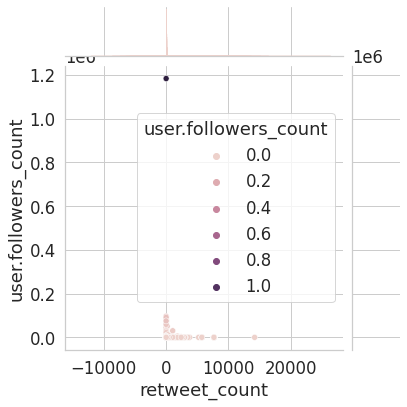

In [ ]:
# I check it on retweet counts
# It is not very informative

sns.jointplot(x = 'retweet_count', y = 'user.followers_count', hue = "user.followers_count", data = df)
plt.show()

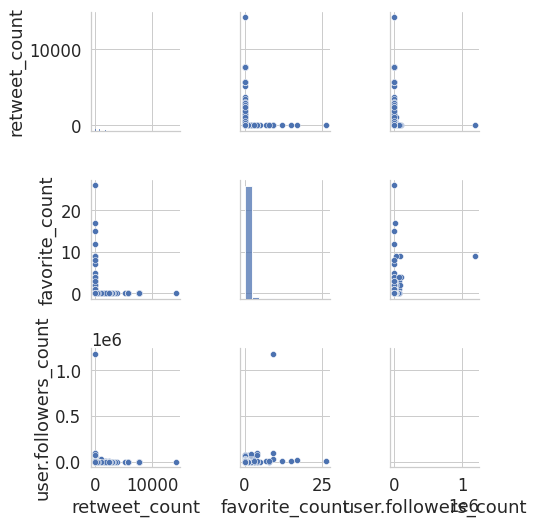

In [ ]:
# I use pairplot as part of EDA

sns.pairplot(df)
plt.show()

In [ ]:
df.describe()

,retweet_count,favorite_count,user.followers_count
count,1000.000000,1000.000000,1.000000e+03
mean,393.866000,0.294000,3.424463e+03
std,1295.815236,1.423935,3.856606e+04
min,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,3.475000e+01
50%,2.000000,0.000000,1.425000e+02
75%,95.000000,0.000000,6.307500e+02
max,14195.000000,26.000000,1.183222e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   text                  1000 non-null   object
 1   user.location         1000 non-null   object
 2   user.description      1000 non-null   object
 3   retweet_count         1000 non-null   int64 
 4   favorite_count        1000 non-null   int64 
 5   user.followers_count  1000 non-null   int64 
 6   Dates                 1000 non-null   object
 7   Time                  1000 non-null   object
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# For text work I create even a smaller dataset with just 2 columns
# 2 columns I want to use are retweet_count and text
# this will allow me to work with the linguistic data and compare it to tweet's popularity (=retweet)

tweet_df  = pd.DataFrame(df[['retweet_count', 'text']])
tweet_df

,retweet_count,text
0,280,"RT @CoinMarketCap: .@Chiliz, one of the biggest names in the blockchain space for virtual sports..."
1,1,RT @idaveofficial: This is a bull race. Which ride do you select ? One is going to Moon🌑 another...
2,0,@crypto_merlion @loomdart Can you share the wallet address?
3,0,$BTC UPDATE!!❗️❗️❗️\n\nCheckout the link in bio for crypto signals\n\n$BEAM #cryptocurrency $ZEC...
4,464,RT @FinanceCrystal: 🆓️Get free 1000 $CRYSTAL #Airdrop ! Money bag👇\n\n🔶 Follow &amp; RT pinned p...
...,...,...
995,3,"RT @shaineschroeder: “Samo”\nAcrylic on Canvas, 6 ft. x 5 ft. 10 in.\n\n#nft #cryptoart #nftart ..."
996,4,RT @Paloresow: In addition to pretending to be an SNP supporter in favour of #IndyRef2 &amp; #An...
997,267,RT @LockedInTeam: I'll give $100 to a random person who retweets this tweet &amp; follows @BcGam...
998,0,"@TheStalwart By the time the bonds mature, every asset (stocks, crypto, commodities, real estate..."


In [ ]:
# I group tweets by number of retweets
# My goal is to undertand how many tweets have 2 or less retweets
# My second goal is to understand how to gauge popularity of a tweet
# After seeing these results I decide to focus on tweets with 20+ retweets (about 1/3 of the set)
# From here on I will refer to popular tweet when tweet has more than 20 retweets

rt_50= tweet_df[tweet_df['retweet_count']>50].count()
rt_40=tweet_df[tweet_df['retweet_count']>40].count()
rt_30=tweet_df[tweet_df['retweet_count']>30].count()
rt_20=tweet_df[tweet_df['retweet_count']>20].count()
rt_10=tweet_df[tweet_df['retweet_count']>10].count()
rt_5=tweet_df[tweet_df['retweet_count']>5].count()
rt_2=tweet_df[tweet_df['retweet_count']>2].count()

print("More than 50 retweets ", rt_50)
print("More than 40 retweets ", rt_40)
print("More than 30 retweets ", rt_30)
print("More than 20 retweets ", rt_20)
print("More than 10 retweets ", rt_10)
print("More than 5 retweets ", rt_5)
print("More than 2 retweets ", rt_2)

More than 50 retweets  retweet_count    308
text             308
dtype: int64
More than 40 retweets  retweet_count    318
text             318
dtype: int64
More than 30 retweets  retweet_count    324
text             324
dtype: int64
More than 20 retweets  retweet_count    342
text             342
dtype: int64
More than 10 retweets  retweet_count    377
text             377
dtype: int64
More than 5 retweets  retweet_count    405
text             405
dtype: int64
More than 2 retweets  retweet_count    474
text             474
dtype: int64


(-0.5, 399.5, 199.5, -0.5)

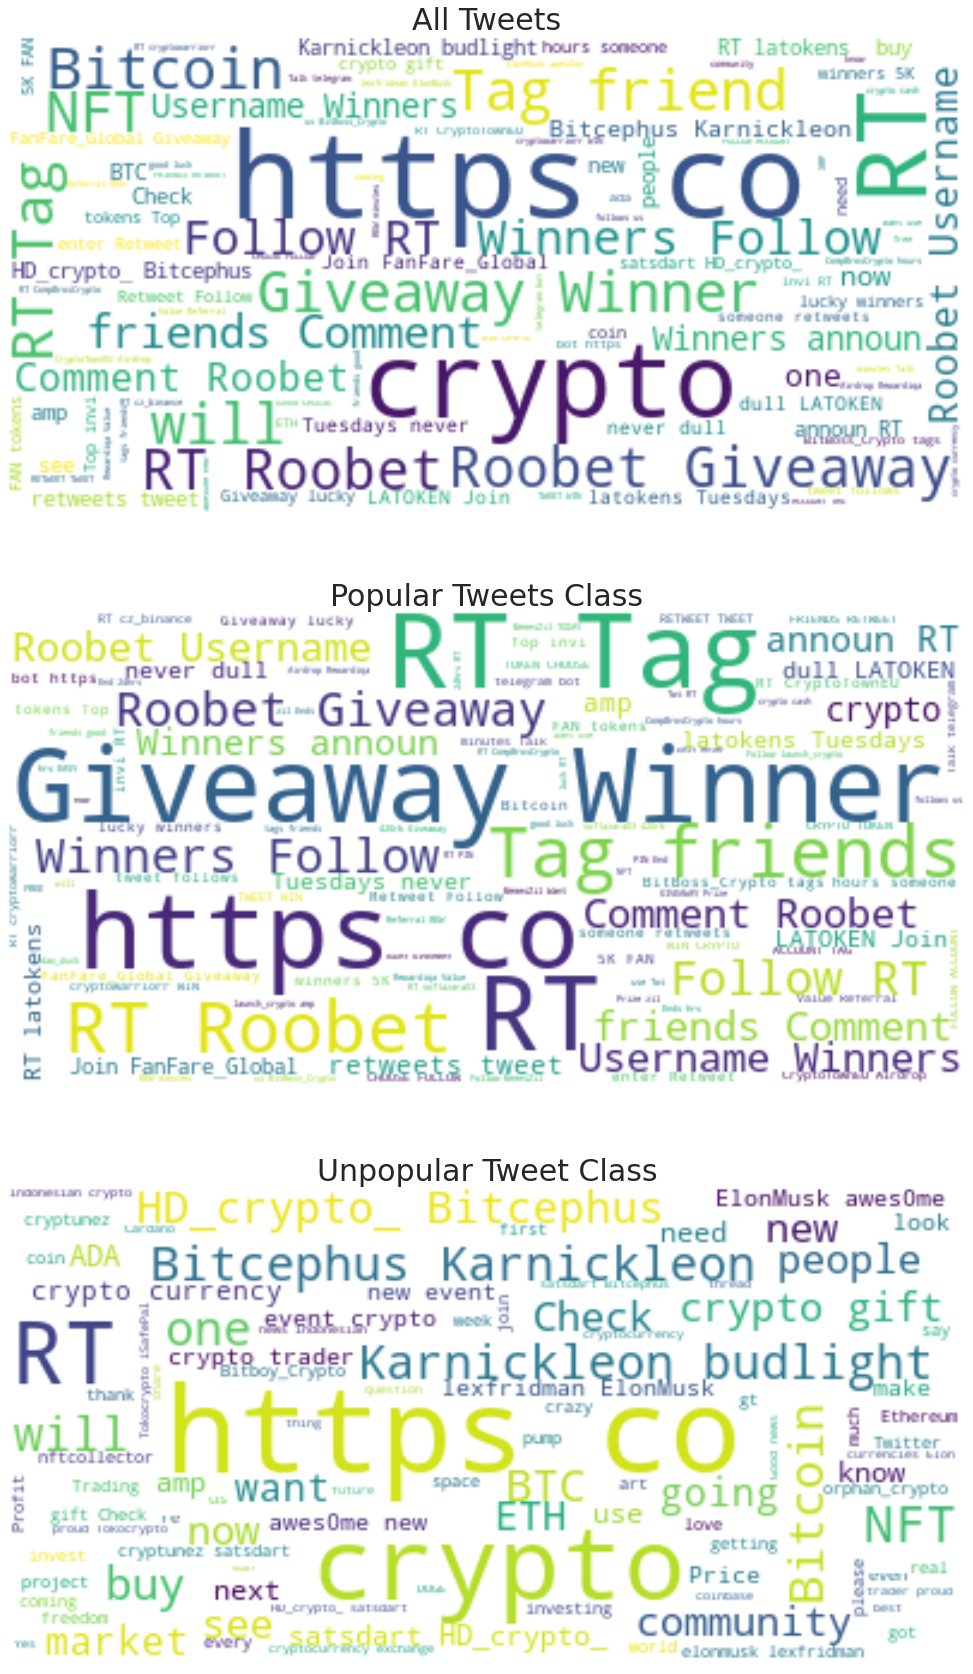

In [ ]:
# To start with I use all tweet data (not cleaned)
# I create 3 word clouds
# All tweets, popular tweets (20+ retweets), unpopular tweets (20 or less retweets)

# I found this kaggle source that I used as a base to create word clouds https://www.kaggle.com/ragnisah/text-data-cleaning-tweets-analysis


from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# Start with one review:
df_pop = tweet_df[tweet_df['retweet_count']>20]
df_notpop = tweet_df[tweet_df['retweet_count'] <= 20]
tweet_All = " ".join(review for review in df.text)
tweet_pop = " ".join(review for review in df_pop.text)
tweet_notpop = " ".join(review for review in df_notpop.text)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_pop = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_pop)
wordcloud_notpop = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_notpop)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_pop, interpolation='bilinear')
ax[1].set_title('Popular Tweets Class',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_notpop, interpolation='bilinear')
ax[2].set_title('Unpopular Tweet Class',fontsize=30)
ax[2].axis('off')

#wordcloud.to_file("img/first_review.png")

**Next step: Pre-processing text data**

Most of the text data are cleaned by following below steps.

Remove punctuations


Tokenization - Converting a sentence into list of words


Remove stopwords

Lammetization/stemming - Tranforming any form of a word to its root word

In [ ]:
# This is the string with punctuation

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Remove punctuation from the column 'text' and save it to a new column

def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tweet_df['tweet_punct'] = df['text'].apply(lambda x: remove_punct(x))
tweet_df.head(10)

,retweet_count,text,tweet_punct
0,280,"RT @CoinMarketCap: .@Chiliz, one of the biggest names in the blockchain space for virtual sports...",RT CoinMarketCap Chiliz one of the biggest names in the blockchain space for virtual sports and ...
1,1,RT @idaveofficial: This is a bull race. Which ride do you select ? One is going to Moon🌑 another...,RT idaveofficial This is a bull race Which ride do you select One is going to Moon🌑 another is ...
2,0,@crypto_merlion @loomdart Can you share the wallet address?,cryptomerlion loomdart Can you share the wallet address
3,0,$BTC UPDATE!!❗️❗️❗️\n\nCheckout the link in bio for crypto signals\n\n$BEAM #cryptocurrency $ZEC...,BTC UPDATE❗️❗️❗️\n\nCheckout the link in bio for crypto signals\n\nBEAM cryptocurrency ZEC APPC ...
4,464,RT @FinanceCrystal: 🆓️Get free 1000 $CRYSTAL #Airdrop ! Money bag👇\n\n🔶 Follow &amp; RT pinned p...,RT FinanceCrystal 🆓️Get free CRYSTAL Airdrop Money bag👇\n\n🔶 Follow amp RT pinned post Finance...
5,18,RT @Woodsy1983: Come and join one of the fastest-growing #Crypto projects that are taking #Vietn...,RT Woodsy Come and join one of the fastestgrowing Crypto projects that are taking Vietnam by sto...
6,4,RT @FTPartners: Global cryptocurrency exchange @coinbase files to go public via a direct listing...,RT FTPartners Global cryptocurrency exchange coinbase files to go public via a direct listing on...
7,0,@stevexbt @satsdart @HD_crypto_ @Bitcephus @Karnickleon @budlight just log off man,stevexbt satsdart HDcrypto Bitcephus Karnickleon budlight just log off man
8,3,RT @frombroke2bags: Had a few sips of whiskey and got in my feels due to recent events so imma d...,RT frombrokebags Had a few sips of whiskey and got in my feels due to recent events so imma drop...
9,427,RT @rekodi_i: BIG CHANGES: \n\nOne random retweet will win the Samurai | by rekodi @ 9p\n\n3 peo...,RT rekodii BIG CHANGES \n\nOne random retweet will win the Samurai by rekodi p\n\n people will...


In [ ]:
# Remove tokens

def tokenization(text):
    text = re.split('\W+', text)
    return text

tweet_df['tweet_tokenized'] = tweet_df['tweet_punct'].apply(lambda x: tokenization(x.lower()))
tweet_df.head()

,retweet_count,text,tweet_punct,tweet_tokenized
0,280,"RT @CoinMarketCap: .@Chiliz, one of the biggest names in the blockchain space for virtual sports...",RT CoinMarketCap Chiliz one of the biggest names in the blockchain space for virtual sports and ...,"[rt, coinmarketcap, chiliz, one, of, the, biggest, names, in, the, blockchain, space, for, virtu..."
1,1,RT @idaveofficial: This is a bull race. Which ride do you select ? One is going to Moon🌑 another...,RT idaveofficial This is a bull race Which ride do you select One is going to Moon🌑 another is ...,"[rt, idaveofficial, this, is, a, bull, race, which, ride, do, you, select, one, is, going, to, m..."
2,0,@crypto_merlion @loomdart Can you share the wallet address?,cryptomerlion loomdart Can you share the wallet address,"[cryptomerlion, loomdart, can, you, share, the, wallet, address]"
3,0,$BTC UPDATE!!❗️❗️❗️\n\nCheckout the link in bio for crypto signals\n\n$BEAM #cryptocurrency $ZEC...,BTC UPDATE❗️❗️❗️\n\nCheckout the link in bio for crypto signals\n\nBEAM cryptocurrency ZEC APPC ...,"[btc, update, checkout, the, link, in, bio, for, crypto, signals, beam, cryptocurrency, zec, app..."
4,464,RT @FinanceCrystal: 🆓️Get free 1000 $CRYSTAL #Airdrop ! Money bag👇\n\n🔶 Follow &amp; RT pinned p...,RT FinanceCrystal 🆓️Get free CRYSTAL Airdrop Money bag👇\n\n🔶 Follow amp RT pinned post Finance...,"[rt, financecrystal, get, free, crystal, airdrop, money, bag, follow, amp, rt, pinned, post, fin..."


In [ ]:
tweet_df['tweet_tokenized']

0      [rt, coinmarketcap, chiliz, one, of, the, biggest, names, in, the, blockchain, space, for, virtu...
1      [rt, idaveofficial, this, is, a, bull, race, which, ride, do, you, select, one, is, going, to, m...
2                                         [cryptomerlion, loomdart, can, you, share, the, wallet, address]
3      [btc, update, checkout, the, link, in, bio, for, crypto, signals, beam, cryptocurrency, zec, app...
4      [rt, financecrystal, get, free, crystal, airdrop, money, bag, follow, amp, rt, pinned, post, fin...
                                                      ...                                                 
995    [rt, shaineschroeder, samo, acrylic, on, canvas, ft, x, ft, in, nft, cryptoart, nftart, nfts, nf...
996    [rt, paloresow, in, addition, to, pretending, to, be, an, snp, supporter, in, favour, of, indyre...
997    [rt, lockedinteam, ill, give, to, a, random, person, who, retweets, this, tweet, amp, follows, b...
998    [thestalwart, by, the, time, t

In [ ]:
# Import stopwords from corpus

import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')


# Identify what are other stopwords in this particular context and add them to stopwords list

stopword.extend(['RT', 'rt', 'some', 'awesome', 'about','https','co', 'time', 'sell', 'buy', 'year', 'years', 'weeks', 'week',
                 'hello', 'hi', 'hay', 'may','day', 'case','old'])

stopword

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Remove stopwords

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tweet_df['tweet_nonstop'] = tweet_df['tweet_tokenized'].apply(lambda x: remove_stopwords(x))
tweet_df.head(10)

,retweet_count,text,tweet_punct,tweet_tokenized,tweet_nonstop
0,280,"RT @CoinMarketCap: .@Chiliz, one of the biggest names in the blockchain space for virtual sports...",RT CoinMarketCap Chiliz one of the biggest names in the blockchain space for virtual sports and ...,"[rt, coinmarketcap, chiliz, one, of, the, biggest, names, in, the, blockchain, space, for, virtu...","[coinmarketcap, chiliz, one, biggest, names, blockchain, space, virtual, sports, gaming, crowdfu..."
1,1,RT @idaveofficial: This is a bull race. Which ride do you select ? One is going to Moon🌑 another...,RT idaveofficial This is a bull race Which ride do you select One is going to Moon🌑 another is ...,"[rt, idaveofficial, this, is, a, bull, race, which, ride, do, you, select, one, is, going, to, m...","[idaveofficial, bull, race, ride, select, one, going, moon, another, going, mars, siacoin, carda..."
2,0,@crypto_merlion @loomdart Can you share the wallet address?,cryptomerlion loomdart Can you share the wallet address,"[cryptomerlion, loomdart, can, you, share, the, wallet, address]","[cryptomerlion, loomdart, share, wallet, address]"
3,0,$BTC UPDATE!!❗️❗️❗️\n\nCheckout the link in bio for crypto signals\n\n$BEAM #cryptocurrency $ZEC...,BTC UPDATE❗️❗️❗️\n\nCheckout the link in bio for crypto signals\n\nBEAM cryptocurrency ZEC APPC ...,"[btc, update, checkout, the, link, in, bio, for, crypto, signals, beam, cryptocurrency, zec, app...","[btc, update, checkout, link, bio, crypto, signals, beam, cryptocurrency, zec, appc, stmx, bitco..."
4,464,RT @FinanceCrystal: 🆓️Get free 1000 $CRYSTAL #Airdrop ! Money bag👇\n\n🔶 Follow &amp; RT pinned p...,RT FinanceCrystal 🆓️Get free CRYSTAL Airdrop Money bag👇\n\n🔶 Follow amp RT pinned post Finance...,"[rt, financecrystal, get, free, crystal, airdrop, money, bag, follow, amp, rt, pinned, post, fin...","[financecrystal, get, free, crystal, airdrop, money, bag, follow, amp, pinned, post, financecrys..."
5,18,RT @Woodsy1983: Come and join one of the fastest-growing #Crypto projects that are taking #Vietn...,RT Woodsy Come and join one of the fastestgrowing Crypto projects that are taking Vietnam by sto...,"[rt, woodsy, come, and, join, one, of, the, fastestgrowing, crypto, projects, that, are, taking,...","[woodsy, come, join, one, fastestgrowing, crypto, projects, taking, vietnam, storm, learn, kardi..."
6,4,RT @FTPartners: Global cryptocurrency exchange @coinbase files to go public via a direct listing...,RT FTPartners Global cryptocurrency exchange coinbase files to go public via a direct listing on...,"[rt, ftpartners, global, cryptocurrency, exchange, coinbase, files, to, go, public, via, a, dire...","[ftpartners, global, cryptocurrency, exchange, coinbase, files, go, public, via, direct, listing..."
7,0,@stevexbt @satsdart @HD_crypto_ @Bitcephus @Karnickleon @budlight just log off man,stevexbt satsdart HDcrypto Bitcephus Karnickleon budlight just log off man,"[stevexbt, satsdart, hdcrypto, bitcephus, karnickleon, budlight, just, log, off, man]","[stevexbt, satsdart, hdcrypto, bitcephus, karnickleon, budlight, log, man]"
8,3,RT @frombroke2bags: Had a few sips of whiskey and got in my feels due to recent events so imma d...,RT frombrokebags Had a few sips of whiskey and got in my feels due to recent events so imma drop...,"[rt, frombrokebags, had, a, few, sips, of, whiskey, and, got, in, my, feels, due, to, recent, ev...","[frombrokebags, sips, whiskey, got, feels, due, recent, events, imma, drop, thread, last, crypto, ]"
9,427,RT @rekodi_i: BIG CHANGES: \n\nOne random retweet will win the Samurai | by rekodi @ 9p\n\n3 peo...,RT rekodii BIG CHANGES \n\nOne random retweet will win the Samurai by rekodi p\n\n people will...,"[rt, rekodii, big, changes, one, random, retweet, will, win, the, samurai, by, rekodi, p, people...","[rekodii, big, changes, one, random, retweet, win, samurai, rekodi, p, people, compete, mentione..."


In [ ]:
# Identify slang / abbreviations / token words in crypto vocabulary on twitter

slang=(['cpege', 'mu', 'futur','promis', 'activ', 'anoth','btc','crypto' ])

slang

['cpege', 'mu', 'futur', 'promis', 'activ', 'anoth', 'btc', 'crypto']

In [ ]:
# Remove slang

def remove_slang(text):
    text = [word for word in text if word not in slang]
    return text
    
tweet_df['tweet_nonslang'] = tweet_df['tweet_nonstop'].apply(lambda x: remove_slang(x))
tweet_df.head(10)

,retweet_count,text,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_nonslang
0,280,"RT @CoinMarketCap: .@Chiliz, one of the biggest names in the blockchain space for virtual sports...",RT CoinMarketCap Chiliz one of the biggest names in the blockchain space for virtual sports and ...,"[rt, coinmarketcap, chiliz, one, of, the, biggest, names, in, the, blockchain, space, for, virtu...","[coinmarketcap, chiliz, one, biggest, names, blockchain, space, virtual, sports, gaming, crowdfu...","[coinmarketcap, chiliz, one, biggest, names, blockchain, space, virtual, sports, gaming, crowdfu..."
1,1,RT @idaveofficial: This is a bull race. Which ride do you select ? One is going to Moon🌑 another...,RT idaveofficial This is a bull race Which ride do you select One is going to Moon🌑 another is ...,"[rt, idaveofficial, this, is, a, bull, race, which, ride, do, you, select, one, is, going, to, m...","[idaveofficial, bull, race, ride, select, one, going, moon, another, going, mars, siacoin, carda...","[idaveofficial, bull, race, ride, select, one, going, moon, another, going, mars, siacoin, carda..."
2,0,@crypto_merlion @loomdart Can you share the wallet address?,cryptomerlion loomdart Can you share the wallet address,"[cryptomerlion, loomdart, can, you, share, the, wallet, address]","[cryptomerlion, loomdart, share, wallet, address]","[cryptomerlion, loomdart, share, wallet, address]"
3,0,$BTC UPDATE!!❗️❗️❗️\n\nCheckout the link in bio for crypto signals\n\n$BEAM #cryptocurrency $ZEC...,BTC UPDATE❗️❗️❗️\n\nCheckout the link in bio for crypto signals\n\nBEAM cryptocurrency ZEC APPC ...,"[btc, update, checkout, the, link, in, bio, for, crypto, signals, beam, cryptocurrency, zec, app...","[btc, update, checkout, link, bio, crypto, signals, beam, cryptocurrency, zec, appc, stmx, bitco...","[update, checkout, link, bio, signals, beam, cryptocurrency, zec, appc, stmx, bitcoin, httpstcon..."
4,464,RT @FinanceCrystal: 🆓️Get free 1000 $CRYSTAL #Airdrop ! Money bag👇\n\n🔶 Follow &amp; RT pinned p...,RT FinanceCrystal 🆓️Get free CRYSTAL Airdrop Money bag👇\n\n🔶 Follow amp RT pinned post Finance...,"[rt, financecrystal, get, free, crystal, airdrop, money, bag, follow, amp, rt, pinned, post, fin...","[financecrystal, get, free, crystal, airdrop, money, bag, follow, amp, pinned, post, financecrys...","[financecrystal, get, free, crystal, airdrop, money, bag, follow, amp, pinned, post, financecrys..."
5,18,RT @Woodsy1983: Come and join one of the fastest-growing #Crypto projects that are taking #Vietn...,RT Woodsy Come and join one of the fastestgrowing Crypto projects that are taking Vietnam by sto...,"[rt, woodsy, come, and, join, one, of, the, fastestgrowing, crypto, projects, that, are, taking,...","[woodsy, come, join, one, fastestgrowing, crypto, projects, taking, vietnam, storm, learn, kardi...","[woodsy, come, join, one, fastestgrowing, projects, taking, vietnam, storm, learn, kardiachain, ..."
6,4,RT @FTPartners: Global cryptocurrency exchange @coinbase files to go public via a direct listing...,RT FTPartners Global cryptocurrency exchange coinbase files to go public via a direct listing on...,"[rt, ftpartners, global, cryptocurrency, exchange, coinbase, files, to, go, public, via, a, dire...","[ftpartners, global, cryptocurrency, exchange, coinbase, files, go, public, via, direct, listing...","[ftpartners, global, cryptocurrency, exchange, coinbase, files, go, public, via, direct, listing..."
7,0,@stevexbt @satsdart @HD_crypto_ @Bitcephus @Karnickleon @budlight just log off man,stevexbt satsdart HDcrypto Bitcephus Karnickleon budlight just log off man,"[stevexbt, satsdart, hdcrypto, bitcephus, karnickleon, budlight, just, log, off, man]","[stevexbt, satsdart, hdcrypto, bitcephus, karnickleon, budlight, log, man]","[stevexbt, satsdart, hdcrypto, bitcephus, karnickleon, budlight, log, man]"
8,3,RT @frombroke2bags: Had a few sips of whiskey and got in my feels due to recent events so imma d...,RT frombrokebags Had a few sips of whiskey and got in my fee

In [ ]:
# Identify common words

commong_words=(['random', 'retweet', 'new', 'get', 'buy', 'also','must', 'follow', 'give', 'giveaway', 'like', 'friend', 'see', 'us', 'know',''])

commong_words

['random',
 'retweet',
 'new',
 'get',
 'buy',
 'also',
 'must',
 'follow',
 'give',
 'giveaway',
 'like',
 'friend',
 'see',
 'us',
 'know',
 '']

In [ ]:
# Remove common words

def remove_common(text):
    text = [word for word in text if word not in commong_words]
    return text
    
tweet_df['tweet_noncommon'] = tweet_df['tweet_nonslang'].apply(lambda x: remove_common(x))
tweet_df.head(10)

,retweet_count,text,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_nonslang,tweet_noncommon
0,280,"RT @CoinMarketCap: .@Chiliz, one of the biggest names in the blockchain space for virtual sports...",RT CoinMarketCap Chiliz one of the biggest names in the blockchain space for virtual sports and ...,"[rt, coinmarketcap, chiliz, one, of, the, biggest, names, in, the, blockchain, space, for, virtu...","[coinmarketcap, chiliz, one, biggest, names, blockchain, space, virtual, sports, gaming, crowdfu...","[coinmarketcap, chiliz, one, biggest, names, blockchain, space, virtual, sports, gaming, crowdfu...","[coinmarketcap, chiliz, one, biggest, names, blockchain, space, virtual, sports, gaming, crowdfu..."
1,1,RT @idaveofficial: This is a bull race. Which ride do you select ? One is going to Moon🌑 another...,RT idaveofficial This is a bull race Which ride do you select One is going to Moon🌑 another is ...,"[rt, idaveofficial, this, is, a, bull, race, which, ride, do, you, select, one, is, going, to, m...","[idaveofficial, bull, race, ride, select, one, going, moon, another, going, mars, siacoin, carda...","[idaveofficial, bull, race, ride, select, one, going, moon, another, going, mars, siacoin, carda...","[idaveofficial, bull, race, ride, select, one, going, moon, another, going, mars, siacoin, carda..."
2,0,@crypto_merlion @loomdart Can you share the wallet address?,cryptomerlion loomdart Can you share the wallet address,"[cryptomerlion, loomdart, can, you, share, the, wallet, address]","[cryptomerlion, loomdart, share, wallet, address]","[cryptomerlion, loomdart, share, wallet, address]","[cryptomerlion, loomdart, share, wallet, address]"
3,0,$BTC UPDATE!!❗️❗️❗️\n\nCheckout the link in bio for crypto signals\n\n$BEAM #cryptocurrency $ZEC...,BTC UPDATE❗️❗️❗️\n\nCheckout the link in bio for crypto signals\n\nBEAM cryptocurrency ZEC APPC ...,"[btc, update, checkout, the, link, in, bio, for, crypto, signals, beam, cryptocurrency, zec, app...","[btc, update, checkout, link, bio, crypto, signals, beam, cryptocurrency, zec, appc, stmx, bitco...","[update, checkout, link, bio, signals, beam, cryptocurrency, zec, appc, stmx, bitcoin, httpstcon...","[update, checkout, link, bio, signals, beam, cryptocurrency, zec, appc, stmx, bitcoin, httpstcon..."
4,464,RT @FinanceCrystal: 🆓️Get free 1000 $CRYSTAL #Airdrop ! Money bag👇\n\n🔶 Follow &amp; RT pinned p...,RT FinanceCrystal 🆓️Get free CRYSTAL Airdrop Money bag👇\n\n🔶 Follow amp RT pinned post Finance...,"[rt, financecrystal, get, free, crystal, airdrop, money, bag, follow, amp, rt, pinned, post, fin...","[financecrystal, get, free, crystal, airdrop, money, bag, follow, amp, pinned, post, financecrys...","[financecrystal, get, free, crystal, airdrop, money, bag, follow, amp, pinned, post, financecrys...","[financecrystal, free, crystal, airdrop, money, bag, amp, pinned, post, financecrystal, amp, htt..."
5,18,RT @Woodsy1983: Come and join one of the fastest-growing #Crypto projects that are taking #Vietn...,RT Woodsy Come and join one of the fastestgrowing Crypto projects that are taking Vietnam by sto...,"[rt, woodsy, come, and, join, one, of, the, fastestgrowing, crypto, projects, that, are, taking,...","[woodsy, come, join, one, fastestgrowing, crypto, projects, taking, vietnam, storm, learn, kardi...","[woodsy, come, join, one, fastestgrowing, projects, taking, vietnam, storm, learn, kardiachain, ...","[woodsy, come, join, one, fastestgrowing, projects, taking, vietnam, storm, learn, kardiachain, ..."
6,4,RT @FTPartners: Global cryptocurrency exchange @coinbase files to go public via a direct listing...,RT FTPartners Global cryptocurrency exchange coinbase files to go public via a direct listing on...,"[rt, ftpartners, global, cryptocurrency, exchange, coinbase, files, to, go, public, via, a, dire...","[ftpartners, global, cryptocurrency, exchange, coinbase, files, go, public, via, direct, listing...","[ftpartners, global, cryptocurrency, exchange, coinbase, files, go, public, via, direct, li

In [ ]:
# Stemming and lammitization
# Ex - developed, development
# Removing everything that is not stem of the word

ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tweet_df['tweet_stemmed'] = tweet_df['tweet_noncommon'].apply(lambda x: stemming(x))
tweet_df.head()

,retweet_count,text,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_nonslang,tweet_noncommon,tweet_stemmed
0,280,"RT @CoinMarketCap: .@Chiliz, one of the biggest names in the blockchain space for virtual sports...",RT CoinMarketCap Chiliz one of the biggest names in the blockchain space for virtual sports and ...,"[rt, coinmarketcap, chiliz, one, of, the, biggest, names, in, the, blockchain, space, for, virtu...","[coinmarketcap, chiliz, one, biggest, names, blockchain, space, virtual, sports, gaming, crowdfu...","[coinmarketcap, chiliz, one, biggest, names, blockchain, space, virtual, sports, gaming, crowdfu...","[coinmarketcap, chiliz, one, biggest, names, blockchain, space, virtual, sports, gaming, crowdfu...","[coinmarketcap, chiliz, one, biggest, name, blockchain, space, virtual, sport, game, crowdfund, ..."
1,1,RT @idaveofficial: This is a bull race. Which ride do you select ? One is going to Moon🌑 another...,RT idaveofficial This is a bull race Which ride do you select One is going to Moon🌑 another is ...,"[rt, idaveofficial, this, is, a, bull, race, which, ride, do, you, select, one, is, going, to, m...","[idaveofficial, bull, race, ride, select, one, going, moon, another, going, mars, siacoin, carda...","[idaveofficial, bull, race, ride, select, one, going, moon, another, going, mars, siacoin, carda...","[idaveofficial, bull, race, ride, select, one, going, moon, another, going, mars, siacoin, carda...","[idaveoffici, bull, race, ride, select, one, go, moon, anoth, go, mar, siacoin, cardano, bitco]"
2,0,@crypto_merlion @loomdart Can you share the wallet address?,cryptomerlion loomdart Can you share the wallet address,"[cryptomerlion, loomdart, can, you, share, the, wallet, address]","[cryptomerlion, loomdart, share, wallet, address]","[cryptomerlion, loomdart, share, wallet, address]","[cryptomerlion, loomdart, share, wallet, address]","[cryptomerlion, loomdart, share, wallet, address]"
3,0,$BTC UPDATE!!❗️❗️❗️\n\nCheckout the link in bio for crypto signals\n\n$BEAM #cryptocurrency $ZEC...,BTC UPDATE❗️❗️❗️\n\nCheckout the link in bio for crypto signals\n\nBEAM cryptocurrency ZEC APPC ...,"[btc, update, checkout, the, link, in, bio, for, crypto, signals, beam, cryptocurrency, zec, app...","[btc, update, checkout, link, bio, crypto, signals, beam, cryptocurrency, zec, appc, stmx, bitco...","[update, checkout, link, bio, signals, beam, cryptocurrency, zec, appc, stmx, bitcoin, httpstcon...","[update, checkout, link, bio, signals, beam, cryptocurrency, zec, appc, stmx, bitcoin, httpstcon...","[updat, checkout, link, bio, signal, beam, cryptocurr, zec, appc, stmx, bitcoin, httpstconohzacff]"
4,464,RT @FinanceCrystal: 🆓️Get free 1000 $CRYSTAL #Airdrop ! Money bag👇\n\n🔶 Follow &amp; RT pinned p...,RT FinanceCrystal 🆓️Get free CRYSTAL Airdrop Money bag👇\n\n🔶 Follow amp RT pinned post Finance...,"[rt, financecrystal, get, free, crystal, airdrop, money, bag, follow, amp, rt, pinned, post, fin...","[financecrystal, get, free, crystal, airdrop, money, bag, follow, amp, pinned, post, financecrys...","[financecrystal, get, free, crystal, airdrop, money, bag, follow, amp, pinned, post, financecrys...","[financecrystal, free, crystal, airdrop, money, bag, amp, pinned, post, financecrystal, amp, htt...","[financecryst, free, crystal, airdrop, money, bag, amp, pin, post, financecryst, amp, httpstco]"


Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .

Stemming algorithms work by cutting off the end or the beginning of the word, taking into account a list of common prefixes and suffixes that can be found in an inflected word. This indiscriminate cutting can be successful in some occasions, but not always, and that is why we affirm that this approach presents some limitations. Below we illustrate the method with examples in both English and Spanish.

Lemmatization, on the other hand, takes into consideration the morphological analysis of the words. To do so, it is necessary to have detailed dictionaries which the algorithm can look through to link the form back to its lemma. Again, you can see how it works with the same example words.

Resource https://blog.bitext.com/what-is-the-difference-between-stemming-and-lemmatization/

In [ ]:
# Lemmatize tweets

wn = nltk.WordNetLemmatizer()

import nltk
nltk.download('wordnet')

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

tweet_df['tweet_lemmatized'] = tweet_df['tweet_nonstop'].apply(lambda x: lemmatizer(x))
tweet_df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,retweet_count,text,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_nonslang,tweet_noncommon,tweet_stemmed,tweet_lemmatized
0,280,"RT @CoinMarketCap: .@Chiliz, one of the biggest names in the blockchain space for virtual sports...",RT CoinMarketCap Chiliz one of the biggest names in the blockchain space for virtual sports and ...,"[rt, coinmarketcap, chiliz, one, of, the, biggest, names, in, the, blockchain, space, for, virtu...","[coinmarketcap, chiliz, one, biggest, names, blockchain, space, virtual, sports, gaming, crowdfu...","[coinmarketcap, chiliz, one, biggest, names, blockchain, space, virtual, sports, gaming, crowdfu...","[coinmarketcap, chiliz, one, biggest, names, blockchain, space, virtual, sports, gaming, crowdfu...","[coinmarketcap, chiliz, one, biggest, name, blockchain, space, virtual, sport, game, crowdfund, ...","[coinmarketcap, chiliz, one, biggest, name, blockchain, space, virtual, sport, gaming, crowdfund..."
1,1,RT @idaveofficial: This is a bull race. Which ride do you select ? One is going to Moon🌑 another...,RT idaveofficial This is a bull race Which ride do you select One is going to Moon🌑 another is ...,"[rt, idaveofficial, this, is, a, bull, race, which, ride, do, you, select, one, is, going, to, m...","[idaveofficial, bull, race, ride, select, one, going, moon, another, going, mars, siacoin, carda...","[idaveofficial, bull, race, ride, select, one, going, moon, another, going, mars, siacoin, carda...","[idaveofficial, bull, race, ride, select, one, going, moon, another, going, mars, siacoin, carda...","[idaveoffici, bull, race, ride, select, one, go, moon, anoth, go, mar, siacoin, cardano, bitco]","[idaveofficial, bull, race, ride, select, one, going, moon, another, going, mar, siacoin, cardan..."
2,0,@crypto_merlion @loomdart Can you share the wallet address?,cryptomerlion loomdart Can you share the wallet address,"[cryptomerlion, loomdart, can, you, share, the, wallet, address]","[cryptomerlion, loomdart, share, wallet, address]","[cryptomerlion, loomdart, share, wallet, address]","[cryptomerlion, loomdart, share, wallet, address]","[cryptomerlion, loomdart, share, wallet, address]","[cryptomerlion, loomdart, share, wallet, address]"
3,0,$BTC UPDATE!!❗️❗️❗️\n\nCheckout the link in bio for crypto signals\n\n$BEAM #cryptocurrency $ZEC...,BTC UPDATE❗️❗️❗️\n\nCheckout the link in bio for crypto signals\n\nBEAM cryptocurrency ZEC APPC ...,"[btc, update, checkout, the, link, in, bio, for, crypto, signals, beam, cryptocurrency, zec, app...","[btc, update, checkout, link, bio, crypto, signals, beam, cryptocurrency, zec, appc, stmx, bitco...","[update, checkout, link, bio, signals, beam, cryptocurrency, zec, appc, stmx, bitcoin, httpstcon...","[update, checkout, link, bio, signals, beam, cryptocurrency, zec, appc, stmx, bitcoin, httpstcon...","[updat, checkout, link, bio, signal, beam, cryptocurr, zec, appc, stmx, bitcoin, httpstconohzacff]","[btc, update, checkout, link, bio, crypto, signal, beam, cryptocurrency, zec, appc, stmx, bitcoi..."
4,464,RT @FinanceCrystal: 🆓️Get free 1000 $CRYSTAL #Airdrop ! Money bag👇\n\n🔶 Follow &amp; RT pinned p...,RT FinanceCrystal 🆓️Get free CRYSTAL Airdrop Money bag👇\n\n🔶 Follow amp RT pinned post Finance...,"[rt, financecrystal, get, free, crystal, airdrop, money, bag, follow, amp, rt, pinned, post, fin...","[financecrystal, get, free, crystal, airdrop, money, bag, follow, amp, pinned, post, financecrys...","[financecrystal, get, free, crystal, airdrop, money, bag, follow, amp, pinned, post, financecrys...","[financecrystal, free, crystal, airdrop, money, bag, amp, pinned, post, financecrystal, amp, htt...","[financecryst, free, crystal, airdrop, money, bag, amp, pin, post, financecryst, amp, httpstco]","[financecrystal, get, free, crystal, airdrop, money, bag, follow, amp, pinned, post, financecrys..."


In [ ]:
# Cleaning text (everything in one function)
# It does the same that all the functions above

def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove punctuation
    text_rc = re.sub('[0-9]+', '', text_lc)  # remove digits
    tokens = re.split('\W+', text_rc)    # tokenization
    text_sl = [word for word in tokens if word not in slang] # remove slang
    text_com = [word for word in text_sl if word not in commong_words] #remove common words
    text_stem = [ps.stem(word) for word in text_com if word not in stopword]  # remove stopwords and stemming
    text = [wn.lemmatize(word) for word in text_stem] #lemmatize
    return text

tweet_df['tweet_cleaned'] = tweet_df['text'].apply(lambda x: clean_text(x))
tweet_df.head()

,retweet_count,text,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_nonslang,tweet_noncommon,tweet_stemmed,tweet_lemmatized,tweet_cleaned
0,280,"RT @CoinMarketCap: .@Chiliz, one of the biggest names in the blockchain space for virtual sports...",RT CoinMarketCap Chiliz one of the biggest names in the blockchain space for virtual sports and ...,"[rt, coinmarketcap, chiliz, one, of, the, biggest, names, in, the, blockchain, space, for, virtu...","[coinmarketcap, chiliz, one, biggest, names, blockchain, space, virtual, sports, gaming, crowdfu...","[coinmarketcap, chiliz, one, biggest, names, blockchain, space, virtual, sports, gaming, crowdfu...","[coinmarketcap, chiliz, one, biggest, names, blockchain, space, virtual, sports, gaming, crowdfu...","[coinmarketcap, chiliz, one, biggest, name, blockchain, space, virtual, sport, game, crowdfund, ...","[coinmarketcap, chiliz, one, biggest, name, blockchain, space, virtual, sport, gaming, crowdfund...","[coinmarketcap, chiliz, one, biggest, name, blockchain, space, virtual, sport, game, crowdfund, ..."
1,1,RT @idaveofficial: This is a bull race. Which ride do you select ? One is going to Moon🌑 another...,RT idaveofficial This is a bull race Which ride do you select One is going to Moon🌑 another is ...,"[rt, idaveofficial, this, is, a, bull, race, which, ride, do, you, select, one, is, going, to, m...","[idaveofficial, bull, race, ride, select, one, going, moon, another, going, mars, siacoin, carda...","[idaveofficial, bull, race, ride, select, one, going, moon, another, going, mars, siacoin, carda...","[idaveofficial, bull, race, ride, select, one, going, moon, another, going, mars, siacoin, carda...","[idaveoffici, bull, race, ride, select, one, go, moon, anoth, go, mar, siacoin, cardano, bitco]","[idaveofficial, bull, race, ride, select, one, going, moon, another, going, mar, siacoin, cardan...","[idaveoffici, bull, race, ride, select, one, go, moon, anoth, go, mar, siacoin, cardano, bitco]"
2,0,@crypto_merlion @loomdart Can you share the wallet address?,cryptomerlion loomdart Can you share the wallet address,"[cryptomerlion, loomdart, can, you, share, the, wallet, address]","[cryptomerlion, loomdart, share, wallet, address]","[cryptomerlion, loomdart, share, wallet, address]","[cryptomerlion, loomdart, share, wallet, address]","[cryptomerlion, loomdart, share, wallet, address]","[cryptomerlion, loomdart, share, wallet, address]","[cryptomerlion, loomdart, share, wallet, address]"
3,0,$BTC UPDATE!!❗️❗️❗️\n\nCheckout the link in bio for crypto signals\n\n$BEAM #cryptocurrency $ZEC...,BTC UPDATE❗️❗️❗️\n\nCheckout the link in bio for crypto signals\n\nBEAM cryptocurrency ZEC APPC ...,"[btc, update, checkout, the, link, in, bio, for, crypto, signals, beam, cryptocurrency, zec, app...","[btc, update, checkout, link, bio, crypto, signals, beam, cryptocurrency, zec, appc, stmx, bitco...","[update, checkout, link, bio, signals, beam, cryptocurrency, zec, appc, stmx, bitcoin, httpstcon...","[update, checkout, link, bio, signals, beam, cryptocurrency, zec, appc, stmx, bitcoin, httpstcon...","[updat, checkout, link, bio, signal, beam, cryptocurr, zec, appc, stmx, bitcoin, httpstconohzacff]","[btc, update, checkout, link, bio, crypto, signal, beam, cryptocurrency, zec, appc, stmx, bitcoi...","[updat, checkout, link, bio, signal, beam, cryptocurr, zec, appc, stmx, bitcoin, httpstconohzacff]"
4,464,RT @FinanceCrystal: 🆓️Get free 1000 $CRYSTAL #Airdrop ! Money bag👇\n\n🔶 Follow &amp; RT pinned p...,RT FinanceCrystal 🆓️Get free CRYSTAL Airdrop Money bag👇\n\n🔶 Follow amp RT pinned post Finance...,"[rt, financecrystal, get, free, crystal, airdrop, money, bag, follow, amp, rt, pinned, post, fin...","[financecrystal, get, free, crystal, airdrop, money, bag, follow, amp, pinned, post, financecrys...","[financecrystal, get, free, crystal, airdrop, money, bag, follow, amp, pinned, post, financecrys...","[financecrystal, free, crystal, airdrop, money, bag, amp, pinned, post, financecrystal, amp, htt...","[fi

In [ ]:
# Vectorization

# Cleaning data in single line through passing clean_text in the CountVectorizer

# I did it just to try what I will get

# It doesn't work on "clean_tweet", only on "text" column

countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tweet_df['tweet_cleaned'])
print('{} Number of CLEAN tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

1000 Number of CLEAN tweets has 757 words


In [ ]:
# vectorization

# Cleaning data in single line through passing clean_text in the CountVectorizer

countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tweet_df['text'])
print('{} Number of ALL tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

1000 Number of ALL tweets has 3269 words


In [ ]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,aabb,ab,abil,abl,aboard,absolut,abysm,ac,accept,access,accid,accord,account,acedcoin,achiev,acknowledg,acnzqfzwpqkpcpfxxttpcenxmbxdt,acquir,acr,across,acryl,act,actual,ad,ada,adacharitypool,adam,adamhodl,add,addit,addopt,address,adelcrypto,admir,adopt,adoubl,advanc,advantag,adventur,adybarkan,...,xrpowl,xryanp,xtokenexchang,xtz,ya,yaboijkush,yanirausech,yanke,yasinaww,yay,ye,yea,yeah,yeet,yehboiiiiii,yesterday,yet,yield,yo,yoga,yoroiwallet,youll,young,your,youth,youtub,yr,yup,zaddycrypto,zakalwex,zap,zec,zeroedg,zhusu,zil,zolajesu,zombieznft,zuz,zuzprotocol,⅔
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# - N0 : Popular tweets - have more than 20 retweets
# - N1: Unpopular tweets - have less than 20 retweets

# is "lenght of the tweet" important for its popularity (=retweet)?

In [ ]:
# Create popular and non popular tweet slices

df_pop = tweet_df[tweet_df['retweet_count']>20]
df_notpop = tweet_df[tweet_df['retweet_count'] <=20]


Pop_tweet = tweet_df[tweet_df['retweet_count']>20]['tweet_cleaned'].apply(lambda x: len(x) - len(' '))
NotPop_tweet = tweet_df[tweet_df['retweet_count'] <=20]['tweet_cleaned'].apply(lambda x: len(x) - len(' '))

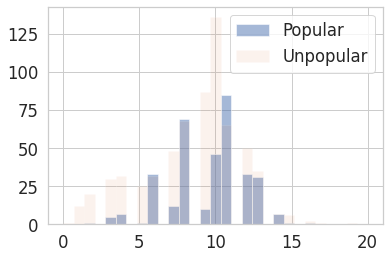

In [ ]:
# Plot the length of popular and unpopular CLEAN tweets

bins_ = np.linspace(0, 20, 30)

plt.hist(Pop_tweet, bins= bins_, alpha = 0.5, label = 'Popular')
plt.hist(NotPop_tweet, bins= bins_, alpha = 0.1, label = 'Unpopular')
plt.legend()

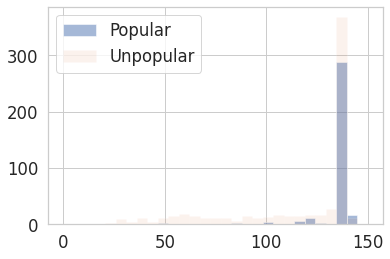

In [ ]:
# Plot the length of popular and unpopular ALL tweets

Pop_tweet = tweet_df[tweet_df['retweet_count']>20]['text'].apply(lambda x: len(x) - len(' '))
NotPop_tweet = tweet_df[tweet_df['retweet_count'] <=20]['text'].apply(lambda x: len(x) - len(' '))

bins_ = np.linspace(0, 150, 30)

plt.hist(Pop_tweet, bins= bins_, alpha = 0.5, label = 'Popular')
plt.hist(NotPop_tweet, bins= bins_, alpha = 0.1, label = 'Unpopular')
plt.legend()

I created a dataframe of active common crypto currencies from wikipedia site https://en.wikipedia.org/wiki/List_of_cryptocurrencies#Active_currencies

In [ ]:
# Dataframe (dictionary) of active common crypto currencies

common_crypto_df = pd.DataFrame({'currency':('Bitcoin Cash','EOS.IO','Cardano','Zcash', 'Ethereum', 'Ethereum Classic', 'Nano', 'Tether', 'Auroracoin', 'Dash','NEO','MazaCoin','Monero','Titcoin','Verge','Stellar','Vertcoin','Dogecoin','Gridcoin','Primecoin','Ripple','Nxt','Peercoin','Litecoin','Namecoin','Bitcoin'),
                   'symbol':('BCH', 'EOS', 'ADA', 'ZEC', 'ETH', 'ETC','Nano', 'USDT','AUR', 'DASH','NEO','MZC','XMR','TIT','XVG','XLM','VTC','DOGE','GRC','XPM','XRP','NXT','PPC','LTC','NMC','BTC')})
common_crypto_df

,currency,symbol
0,Bitcoin Cash,BCH
1,EOS.IO,EOS
2,Cardano,ADA
3,Zcash,ZEC
4,Ethereum,ETH
5,Ethereum Classic,ETC
6,Nano,Nano
7,Tether,USDT
8,Auroracoin,AUR
9,Dash,DASH


In [ ]:
# Find words from currency list in the tweets dataframe

# query = '|'.join(currency_list)

query = '|'.join(common_crypto_df['currency'])

tweet_df['query_match'] = tweet_df['text'].str.contains(query, case=False)
tweet_df['word'] = tweet_df['text'].str.extract('({})'.format(query))

tweet_df.head()

,retweet_count,text,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_nonslang,tweet_noncommon,tweet_stemmed,tweet_lemmatized,tweet_cleaned,query_match,word
0,280,"RT @CoinMarketCap: .@Chiliz, one of the biggest names in the blockchain space for virtual sports...",RT CoinMarketCap Chiliz one of the biggest names in the blockchain space for virtual sports and ...,"[rt, coinmarketcap, chiliz, one, of, the, biggest, names, in, the, blockchain, space, for, virtu...","[coinmarketcap, chiliz, one, biggest, names, blockchain, space, virtual, sports, gaming, crowdfu...","[coinmarketcap, chiliz, one, biggest, names, blockchain, space, virtual, sports, gaming, crowdfu...","[coinmarketcap, chiliz, one, biggest, names, blockchain, space, virtual, sports, gaming, crowdfu...","[coinmarketcap, chiliz, one, biggest, name, blockchain, space, virtual, sport, game, crowdfund, ...","[coinmarketcap, chiliz, one, biggest, name, blockchain, space, virtual, sport, gaming, crowdfund...","[coinmarketcap, chiliz, one, biggest, name, blockchain, space, virtual, sport, game, crowdfund, ...",False,NaN
1,1,RT @idaveofficial: This is a bull race. Which ride do you select ? One is going to Moon🌑 another...,RT idaveofficial This is a bull race Which ride do you select One is going to Moon🌑 another is ...,"[rt, idaveofficial, this, is, a, bull, race, which, ride, do, you, select, one, is, going, to, m...","[idaveofficial, bull, race, ride, select, one, going, moon, another, going, mars, siacoin, carda...","[idaveofficial, bull, race, ride, select, one, going, moon, another, going, mars, siacoin, carda...","[idaveofficial, bull, race, ride, select, one, going, moon, another, going, mars, siacoin, carda...","[idaveoffici, bull, race, ride, select, one, go, moon, anoth, go, mar, siacoin, cardano, bitco]","[idaveofficial, bull, race, ride, select, one, going, moon, another, going, mar, siacoin, cardan...","[idaveoffici, bull, race, ride, select, one, go, moon, anoth, go, mar, siacoin, cardano, bitco]",True,Cardano
2,0,@crypto_merlion @loomdart Can you share the wallet address?,cryptomerlion loomdart Can you share the wallet address,"[cryptomerlion, loomdart, can, you, share, the, wallet, address]","[cryptomerlion, loomdart, share, wallet, address]","[cryptomerlion, loomdart, share, wallet, address]","[cryptomerlion, loomdart, share, wallet, address]","[cryptomerlion, loomdart, share, wallet, address]","[cryptomerlion, loomdart, share, wallet, address]","[cryptomerlion, loomdart, share, wallet, address]",False,NaN
3,0,$BTC UPDATE!!❗️❗️❗️\n\nCheckout the link in bio for crypto signals\n\n$BEAM #cryptocurrency $ZEC...,BTC UPDATE❗️❗️❗️\n\nCheckout the link in bio for crypto signals\n\nBEAM cryptocurrency ZEC APPC ...,"[btc, update, checkout, the, link, in, bio, for, crypto, signals, beam, cryptocurrency, zec, app...","[btc, update, checkout, link, bio, crypto, signals, beam, cryptocurrency, zec, appc, stmx, bitco...","[update, checkout, link, bio, signals, beam, cryptocurrency, zec, appc, stmx, bitcoin, httpstcon...","[update, checkout, link, bio, signals, beam, cryptocurrency, zec, appc, stmx, bitcoin, httpstcon...","[updat, checkout, link, bio, signal, beam, cryptocurr, zec, appc, stmx, bitcoin, httpstconohzacff]","[btc, update, checkout, link, bio, crypto, signal, beam, cryptocurrency, zec, appc, stmx, bitcoi...","[updat, checkout, link, bio, signal, beam, cryptocurr, zec, appc, stmx, bitcoin, httpstconohzacff]",True,NaN
4,464,RT @FinanceCrystal: 🆓️Get free 1000 $CRYSTAL #Airdrop ! Money bag👇\n\n🔶 Follow &amp; RT pinned p...,RT FinanceCrystal 🆓️Get free CRYSTAL Airdrop Money bag👇\n\n🔶 Follow amp RT pinned post Finance...,"[rt, financecrystal, get, free, crystal, airdrop, money, bag, follow, amp, rt, pinned, post, fin...","[financecrystal, get, free, crystal, airdrop, money, bag, follow, amp, pinned, post, financecrys...","[financecrystal, get, free, crystal, airdrop, money, bag, follow, amp, pinned, post, financecrys...","[financecrystal, free, crystal, airdrop, money

In [ ]:
# Check how many reteets we are seeing

tweet_df['retweet_count'].unique()

array([  280,     1,     0,   464,    18,     4,     3,   427,    43,
           5,  1933,    41,   150,    55,   511,    94,  7672,     2,
         533,   267,    79,   310,    78,  5724,    15,    76,  1810,
         719, 14195,    27,    12,    46,   366,     6,   765,  2410,
          36,  1690,  1341,    26,    88,  1443,    63,    33,    71,
          10,   176,    14,   210,    44,   505,     7,    16,   365,
           8,   386,  1057,   192,   286,    21,   364,    11,    74,
          42,    58,    95,    20,   211,   837,   128,   169,    59,
           9,  2020,   125,   110,  1258,   436,   261,  3767,   145,
         224,   183,   193,   590,    19,  5209,    85,  1500,    87,
          67,   812,   127,   121,    61,   463,   281,   613,   196,
         203,  7673,   182,    23,    13,   467,    35,   161,   208,
        1514,    28,  2176,    80,    97,  3502,   205,  3068,  1865,
         252,    32,   197,   372,  2941,    48,   112,    31,   811,
         262,    34,

In [ ]:
# What are the crypto currencies used in this set of tweets

tweet_df['word'].unique()

array([nan, 'Cardano', 'Bitcoin', 'Monero', 'Ethereum', 'Dogecoin',
       'Ripple', 'Nxt', 'Zcash', 'Litecoin'], dtype=object)

In [ ]:
# Count how many times each of these crypto currencies were repeated in this set of tweets

tweet_df['word'].value_counts().to_frame()

,word
Bitcoin,41
Cardano,7
Ethereum,5
Dogecoin,3
Nxt,2
Litecoin,2
Ripple,1
Monero,1
Zcash,1


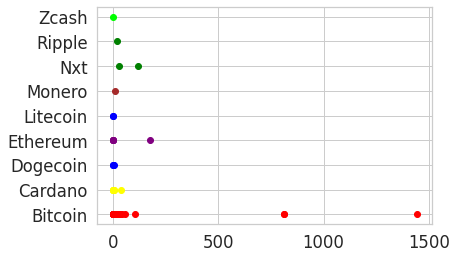

In [ ]:
# Plot the amount of times the cryptocurrency was mentioned in this set of tweets
# If this plot gives you en error, most probably it is because the color code for a certain crytocurrency is missing
# You need to add the currency and the code below, for example: 'Nxt':"green"

crypto_color = {'Bitcoin': "red", 'Dogecoin': "blue",'Ripple':"green", 'Cardano':"yellow", 'Nxt':"green",'Ethereum':"purple", 'NEO':"green",'Zcash':"lime", 'Dash':"pink", 'Verge':'green','Litecoin':"blue", 'Monero':"brown", 'Stellar':"red", 'Nano':'pink', 'Tether':"red"}
for key, grp in tweet_df.groupby(['word']):
  x = grp['retweet_count']
  y = grp['word']
  plt.scatter(x,y, color=crypto_color[key])

plt.show()

In [ ]:
# This plot wasn't interesting

#sns.jointplot(x = 'retweet_count', y = 'word', hue = "word", data = tweet_df)
# plt.show()

In [ ]:
# Count retweets from ALL

tweet_df['text'].value_counts().to_frame()

,text
"RT @Roobet: $2,500 Giveaway!💰\n\n5 Winners - $500 EACH!\n\n-Follow\n-Like and RT❤️\n-Tag 2 friends\n-Comment your Roobet Username🦘\n\nWinners announ…",45
RT @latokens: Tuesdays are never dull on LATOKEN. Join the @FanFare_Global Giveaway!\n\n10 lucky winners to get 5K $FAN tokens each. Top invi…,19
RT @cryptowarriorr: WIN 100$ IN ANY CRYPTO TOKEN YOU CHOOSE!\n\n1. FOLLOW MY ACCOUNT\n2. TAG YOUR CRYPTO FRIENDS.\n3. RETWEET THIS TWEET.\n* WIN…,13
"RT @CompBrosCrypto: $30 in 24 hours to someone that retweets this tweet, follows us, @BitBoss_Crypto and tags friends. That's it, good luck!",13
RT @CryptoTownEU: 🚀 Airdrop: Rewardiqa\n💰 Value: $ 105\n👥 Referral: $ 35 \n💸 15 + 5 REW\n⏰ 2 minutes\n\nTalk with the telegram bot: https://t.co/…,13
...,...
2.) My favorite aspect of this crypto is the Safe Have Inheritance Platform (SHIP).\n\nRead 2nd paragraph. https://t.co/qLVTOiSNGb,1
@Blockchain_Jay The lowest cap i have right now in my port that I believe will have an insane run is $XIV… https://t.co/yKwombUqE2,1
Where are all my #NFT folk @ ? I wanna start collecting but don’t know where like.. the stuff I buy where does it g… https://t.co/7udX18Y0wT,1
"RT @CMTDigitalLtd: Not only does @ErisX_Digital have one of the lowest execution fee schedules in the industry, they also provide real time…",1


In [ ]:
# Count retweets from clean text

tweet_df['tweet_cleaned'].value_counts().to_frame()

,tweet_cleaned
"[roobet, winner, tag, friend, comment, roobet, usernam, winner, announ]",45
"[latoken, tuesday, never, dull, latoken, join, fanfareglob, lucki, winner, k, fan, token, top, invi]",19
"[cryptowarriorr, win, token, choos, account, tag, friend, tweet, win]",13
"[compbroscrypto, hour, someon, retweet, tweet, follow, bitbosscrypto, tag, friend, that, good, luck]",13
"[cryptotowneu, airdrop, rewardiqa, valu, referr, rew, minut, talk, telegram, bot, httpstco]",13
...,...
"[space, financi, freedom, person, gener, wealth, httpstcovlmjiznei]",1
"[stevexbt, cryptunez, satsdart, hdcrypto, bitcephu, karnickleon, budlight, steven, jame, hyde, isnt, british, everyon]",1
"[buckscak, defi, bkc, eth, buckscak, airdrop, need, histori, show, bank, govern, financi, system]",1
"[timonoack, check, artwork, timonoack, withfnd, httpstcooqxjtmdnn, nftcollector, digitalartist]",1


In [ ]:
tweet_words=tweet_df['tweet_cleaned']
s=pd.Series(tweet_words)
tweet_words.describe()

count                                                                        1000
unique                                                                        757
top       [roobet, winner, tag, friend, comment, roobet, usernam, winner, announ]
freq                                                                           45
Name: tweet_cleaned, dtype: object

In [ ]:
tweet_words.head()

0    [coinmarketcap, chiliz, one, biggest, name, blockchain, space, virtual, sport, game, crowdfund, ...
1        [idaveoffici, bull, race, ride, select, one, go, moon, anoth, go, mar, siacoin, cardano, bitco]
2                                                      [cryptomerlion, loomdart, share, wallet, address]
3     [updat, checkout, link, bio, signal, beam, cryptocurr, zec, appc, stmx, bitcoin, httpstconohzacff]
4        [financecryst, free, crystal, airdrop, money, bag, amp, pin, post, financecryst, amp, httpstco]
Name: tweet_cleaned, dtype: object

In [ ]:
len(tweet_words)

1000

In [ ]:
# subset words from tweets

all_words = [item for sublist in tweet_words for item in sublist]

In [ ]:
# List of all words across tweets
import itertools

#all_words = list(itertools.chain(*tweet_words)) # I didn't end up using itertools here

all_words = [item for sublist in tweet_words for item in sublist]

# Create counter
counts = collections.Counter(all_words)

counts.most_common(25)

[('winner', 118),
 ('tag', 92),
 ('roobet', 92),
 ('friend', 75),
 ('bitcoin', 72),
 ('one', 67),
 ('token', 61),
 ('comment', 55),
 ('go', 52),
 ('amp', 48),
 ('usernam', 48),
 ('nft', 45),
 ('announ', 45),
 ('use', 45),
 ('join', 44),
 ('win', 43),
 ('k', 42),
 ('latoken', 41),
 ('hour', 41),
 ('tweet', 39),
 ('end', 39),
 ('airdrop', 38),
 ('check', 37),
 ('cryptocurr', 34),
 ('budlight', 34)]

In [ ]:
# Show it in dataframe

clean_list = pd.DataFrame(counts.most_common(15),
                             columns=['words', 'count'])

clean_list.head(20)

,words,count
0,winner,118
1,tag,92
2,roobet,92
3,friend,75
4,bitcoin,72
5,one,67
6,token,61
7,comment,55
8,go,52
9,amp,48


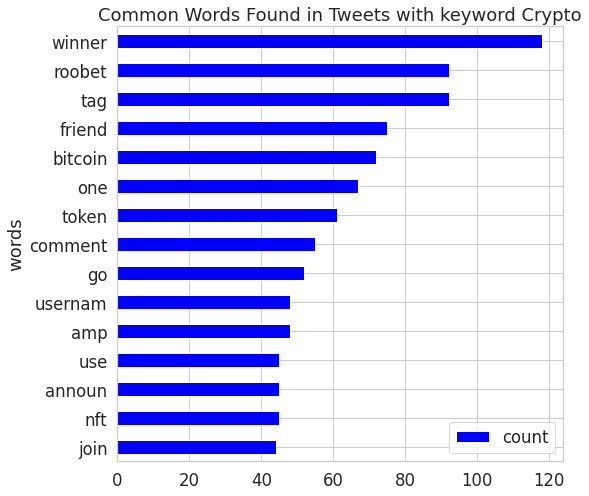

In [ ]:
# Plot the most popular words

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_list.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Common Words Found in Tweets with keyword Crypto")

plt.show()

In [ ]:
# Create a subset of tweets that have zero retweets (unique tweets)

non_repeat_tweets=tweet_df.loc[tweet_df['retweet_count']==0, 'tweet_cleaned']
non_repeat_tweets.describe()


count                                  437
unique                                 437
top       [your, say, start, rubber, band]
freq                                     1
Name: tweet_cleaned, dtype: object

In [ ]:
non_repeat_tweets.head()

2                                                       [cryptomerlion, loomdart, share, wallet, address]
3      [updat, checkout, link, bio, signal, beam, cryptocurr, zec, appc, stmx, bitcoin, httpstconohzacff]
7                               [stevexbt, satsdart, hdcrypto, bitcephu, karnickleon, budlight, log, man]
10                               [one, definet, need, order, hide, person, inform, cent, httpstcoztgocso]
11    [took, cryptocurr, exchang, latoken, two, month, doubl, app, instal, k, k, thousand, httpstcolpb...
Name: tweet_cleaned, dtype: object

In [ ]:
len(non_repeat_tweets)

437

In [ ]:
# List of words from unique tweets

in_non_repeat_words = [item for sublist in non_repeat_tweets for item in sublist]

# Create counter
counts_unique = collections.Counter(in_non_repeat_words)

counts_unique.most_common(25)

[('budlight', 33),
 ('bitcephu', 32),
 ('satsdart', 31),
 ('karnickleon', 31),
 ('hdcrypto', 30),
 ('bitcoin', 29),
 ('cryptunez', 29),
 ('check', 26),
 ('nft', 23),
 ('elonmusk', 18),
 ('gift', 18),
 ('cryptocurr', 16),
 ('invest', 16),
 ('tokocrypto', 16),
 ('need', 15),
 ('good', 15),
 ('news', 15),
 ('lexfridman', 15),
 ('would', 15),
 ('im', 14),
 ('currenc', 14),
 ('blockchain', 13),
 ('elonmuskit', 13),
 ('awesm', 13),
 ('event', 13)]

In [ ]:
# Put it into a dataframe

clean_list_non_repeat = pd.DataFrame(counts_unique.most_common(15),
                             columns=['words', 'count'])

clean_list_non_repeat.head(20)

,words,count
0,budlight,33
1,bitcephu,32
2,satsdart,31
3,karnickleon,31
4,hdcrypto,30
5,bitcoin,29
6,cryptunez,29
7,check,26
8,nft,23
9,elonmusk,18


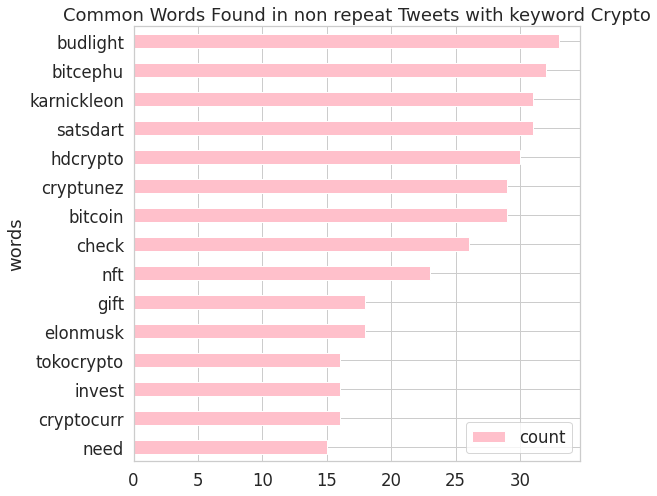

In [ ]:
# Plot popular words from unique tweets

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_list_non_repeat.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="pink")

ax.set_title("Common Words Found in non repeat Tweets with keyword Crypto")

plt.show()

In [ ]:
# Drop retweets from the list, thus we will only have *unique* tweets to analyze repetitive words
# I was just exploring the data

tweet_words=tweet_df['tweet_cleaned']
unique_words=tweet_words.astype(str).drop_duplicates()
unique_words

0      ['coinmarketcap', 'chiliz', 'one', 'biggest', 'name', 'blockchain', 'space', 'virtual', 'sport',...
1      ['idaveoffici', 'bull', 'race', 'ride', 'select', 'one', 'go', 'moon', 'anoth', 'go', 'mar', 'si...
2                                              ['cryptomerlion', 'loomdart', 'share', 'wallet', 'address']
3      ['updat', 'checkout', 'link', 'bio', 'signal', 'beam', 'cryptocurr', 'zec', 'appc', 'stmx', 'bit...
4      ['financecryst', 'free', 'crystal', 'airdrop', 'money', 'bag', 'amp', 'pin', 'post', 'financecry...
                                                      ...                                                 
994    ['bitzlato', 'one', 'episod', 'second', 'season', 'asset', 'use', 'facilit', 'purchas', 'contrab...
995    ['shaineschroed', 'samo', 'acryl', 'canva', 'ft', 'x', 'ft', 'nft', 'cryptoart', 'nftart', 'nft'...
996    ['paloresow', 'addit', 'pretend', 'snp', 'support', 'favour', 'indyref', 'amp', 'annibyniaeth', ...
998    ['thestalwart', 'bond', 'matur

**Insights:**

People who tweet about crypto use a lot of monosylabic abbreviations.
If I want to find interesting words I need to do more work and dig deeper into tweets, phrases, context.